### ---------------------------------------------------------------
📊 BUSINESS ANALYSIS INTERNSHIP – SAIKET SYSTEMS

👩‍💻 INTERN: AARTI MADOLE

🧠 PROJECT: CUSTOMER CHURN ANALYSIS (TELECOM DATA)
### ---------------------------------------------------------------


In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
# Load dataset
df = pd.read_csv(r"E:\Saiket systems\Telco_Customer_Churn_Dataset  (3).csv")

print("✅ Dataset Loaded Successfully!")
print("Shape of the dataset:", df.shape)


✅ Dataset Loaded Successfully!
Shape of the dataset: (7043, 21)


# 🧩 Task 1 – Understand the Dataset

In [10]:
# Preview first 10 rows
print("📄 First 10 Rows:\n", df.head(10))


📄 First 10 Rows:
    customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   
5  9305-CDSKC  Female              0      No         No       8          Yes   
6  1452-KIOVK    Male              0      No        Yes      22          Yes   
7  6713-OKOMC  Female              0      No         No      10           No   
8  7892-POOKP  Female              0     Yes         No      28          Yes   
9  6388-TABGU    Male              0      No        Yes      62          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DS

In [11]:
# Check column names
print("\n🧱 Columns:\n", df.columns.tolist())



🧱 Columns:
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [12]:
# Data types
print("\n📊 Data Types:\n", df.dtypes)



📊 Data Types:
 customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [13]:
# Missing values
print("\n🔍 Missing Values:\n", df.isnull().sum())



🔍 Missing Values:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [14]:
# Summary info
print("\nℹ️ Dataset Info:")
df.info()


ℹ️ Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 n

In [15]:
# Summary statistics
print("\n📈 Summary Statistics:\n", df.describe())



📈 Summary Statistics:
        SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


In [16]:
# Unique value counts for categorical variables
print("\n🔤 Unique Values per Categorical Column:")
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].nunique()} unique values")



🔤 Unique Values per Categorical Column:
customerID: 7043 unique values
gender: 2 unique values
Partner: 2 unique values
Dependents: 2 unique values
PhoneService: 2 unique values
MultipleLines: 3 unique values
InternetService: 3 unique values
OnlineSecurity: 3 unique values
OnlineBackup: 3 unique values
DeviceProtection: 3 unique values
TechSupport: 3 unique values
StreamingTV: 3 unique values
StreamingMovies: 3 unique values
Contract: 3 unique values
PaperlessBilling: 2 unique values
PaymentMethod: 4 unique values
TotalCharges: 6531 unique values
Churn: 2 unique values


# 🧼 Task 2 – Data Cleaning

In [18]:
# Remove duplicates
print("Duplicate Records:", df.duplicated().sum())
df.drop_duplicates(inplace=True)


Duplicate Records: 0


In [22]:
# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())


In [23]:
# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')


In [24]:
# Check missing values after cleaning
print("\nMissing Values After Cleaning:\n", df.isnull().sum())



Missing Values After Cleaning:
 customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64


In [25]:
# Preview cleaned data
print("\nCleaned Dataset Preview:\n", df.head())



Cleaned Dataset Preview:
    customerid  gender  seniorcitizen partner dependents  tenure phoneservice  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      multiplelines internetservice onlinesecurity onlinebackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  deviceprotection techsupport streamingtv streamingmovies        contract  \
0          

# 🔍 Task 3 – Exploratory Data Analysis (EDA)

In [26]:
# Summary stats
print("Summary Stats:\n", df.describe())


Summary Stats:
        seniorcitizen       tenure  monthlycharges  totalcharges
count    7043.000000  7043.000000     7043.000000   7043.000000
mean        0.162147    32.371149       64.761692   2281.916928
std         0.368612    24.559481       30.090047   2265.270398
min         0.000000     0.000000       18.250000     18.800000
25%         0.000000     9.000000       35.500000    402.225000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.850000   3786.600000
max         1.000000    72.000000      118.750000   8684.800000


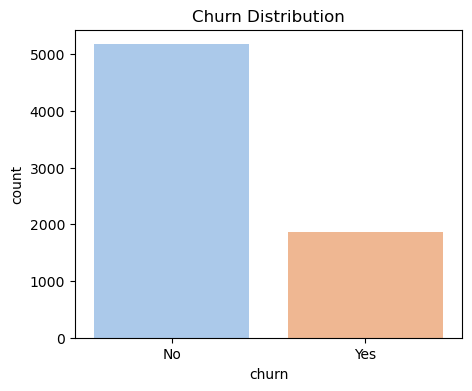

In [28]:
# Churn distribution
plt.figure(figsize=(5,4))
sns.countplot(x='churn', hue='churn', data=df, palette='pastel', legend=False)
plt.title("Churn Distribution")
plt.show()


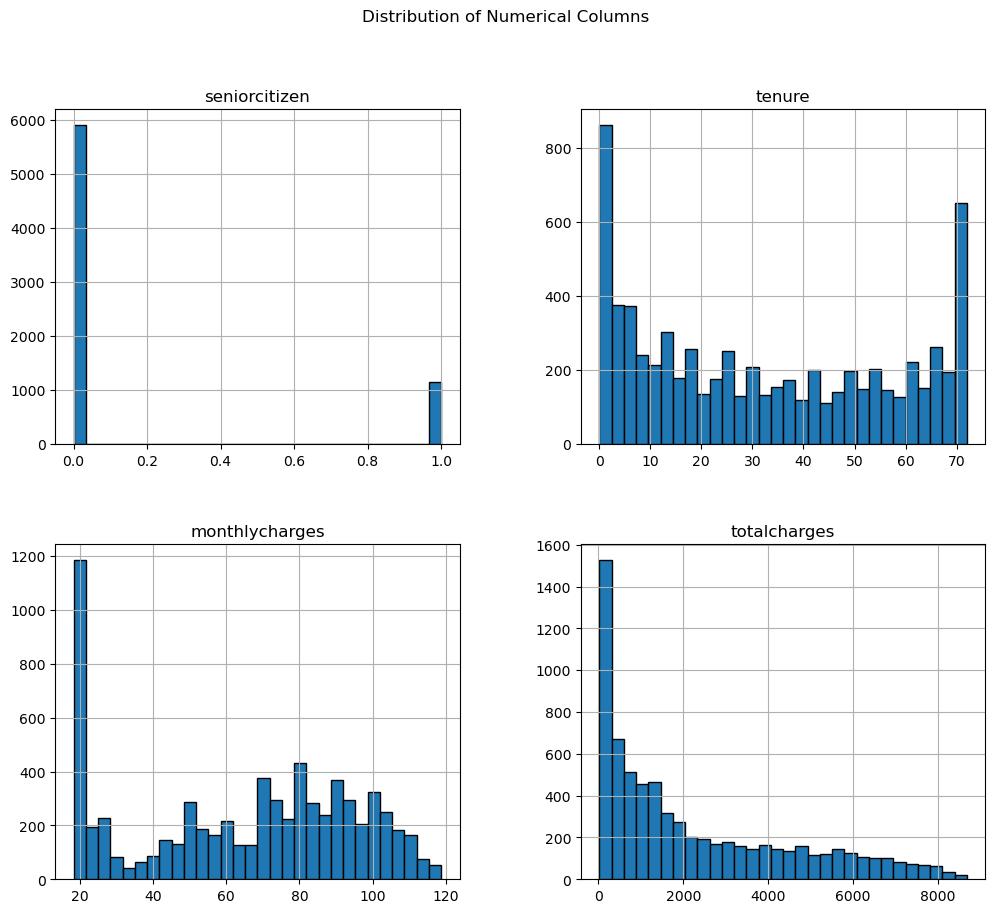

In [29]:
# Histogram of numerical columns
df.hist(figsize=(12,10), bins=30, edgecolor='black')
plt.suptitle("Distribution of Numerical Columns")
plt.show()


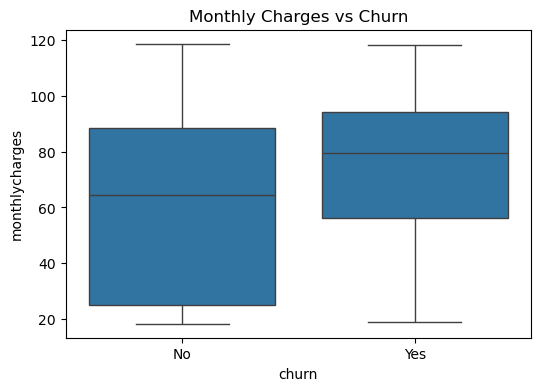

In [31]:
# Boxplot of Monthly Charges by Churn
plt.figure(figsize=(6,4))
sns.boxplot(x='churn', y='monthlycharges', data=df)
plt.title("Monthly Charges vs Churn")
plt.show()


# 📊 Task 4 – Customer Segmentation Visualization

In [32]:
# Tenure segmentation
bins = [0, 12, 36, df['tenure'].max()]
labels = ['0-12 months', '13-36 months', '37+ months']
df['tenure_group'] = pd.cut(df['tenure'], bins=bins, labels=labels, include_lowest=True)


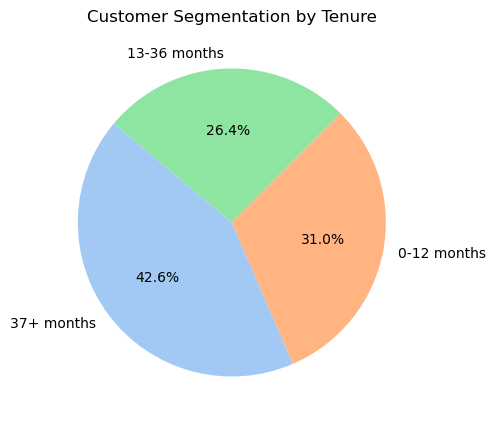

In [33]:
# Pie chart
tenure_counts = df['tenure_group'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(tenure_counts, labels=tenure_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("Customer Segmentation by Tenure")
plt.show()

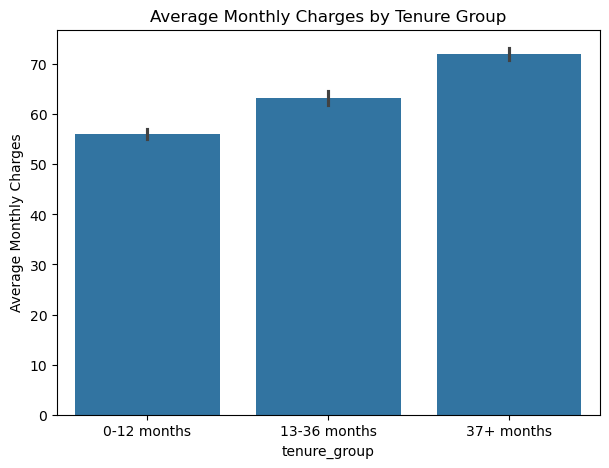

In [35]:
# Bar chart comparing Monthly Charges by Tenure
plt.figure(figsize=(7,5))
sns.barplot(x='tenure_group', y='monthlycharges', data=df, estimator=np.mean)
plt.title("Average Monthly Charges by Tenure Group")
plt.ylabel("Average Monthly Charges")
plt.show()


# 📈 Task 5 – Advanced Analysis


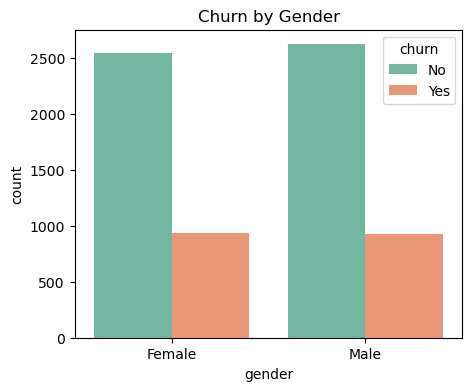

In [36]:
# Churn by Gender
plt.figure(figsize=(5,4))
sns.countplot(x='gender', hue='churn', data=df, palette='Set2')
plt.title("Churn by Gender")
plt.show()


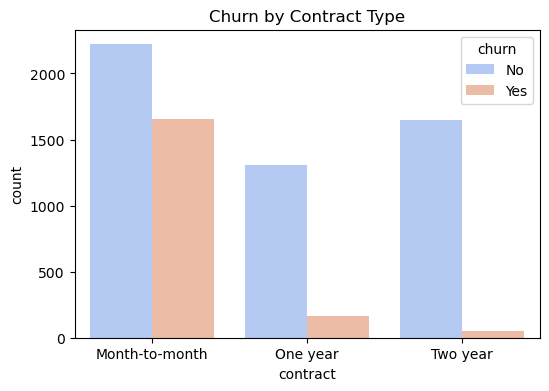

In [37]:
# Churn by Contract Type
plt.figure(figsize=(6,4))
sns.countplot(x='contract', hue='churn', data=df, palette='coolwarm')
plt.title("Churn by Contract Type")
plt.show()

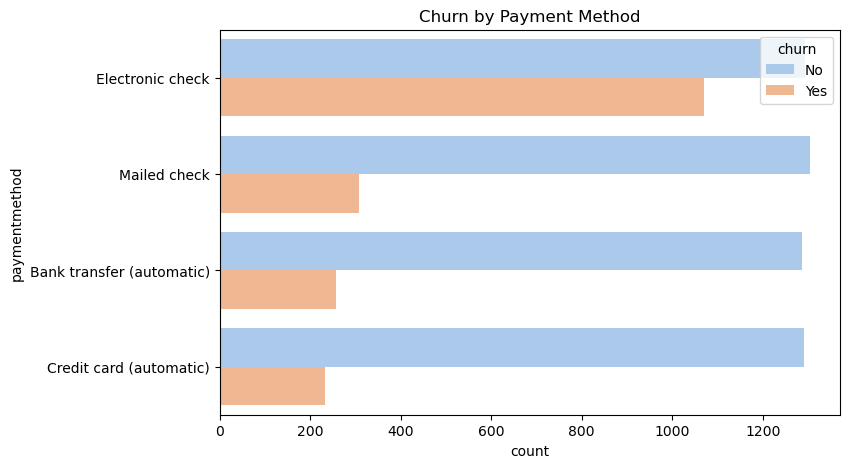

In [38]:
# Churn by Payment Method
plt.figure(figsize=(8,5))
sns.countplot(y='paymentmethod', hue='churn', data=df, palette='pastel')
plt.title("Churn by Payment Method")
plt.show()


In [41]:
# Grouped Analysis by Tenure
tenure_summary = (
    df.groupby('tenure_group', observed=True)[['monthlycharges', 'totalcharges']]
      .mean()
      .reset_index()
)


# 🏁 Conclusion & Insights

In [42]:
# -------------------------------------------
# FINAL INSIGHTS
# -------------------------------------------

print("""
✅ Customers with shorter tenure (0–12 months) show higher churn rates.
✅ Month-to-month contracts have the highest churn.
✅ Customers using Electronic Check as payment method churn more.
✅ Longer-term contracts (One year, Two year) improve retention.
✅ High monthly charges also correlate with increased churn risk.
""")



✅ Customers with shorter tenure (0–12 months) show higher churn rates.
✅ Month-to-month contracts have the highest churn.
✅ Customers using Electronic Check as payment method churn more.
✅ Longer-term contracts (One year, Two year) improve retention.
✅ High monthly charges also correlate with increased churn risk.

